In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Qchains
import plotly.graph_objects as go
from scipy.optimize import curve_fit

In [2]:
ring_points = Qchains.RingGenerater(10, False)
d_hedge = 0.5

Text(0.5, 0.92, '3D Unit Vectors from Origin')

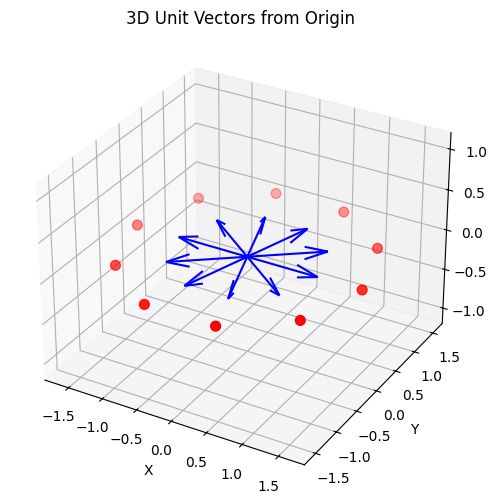

In [3]:
#For each point find the unit vector pointing towards it. Corresponds to the one pointing away at the point (like a hedgehog)
magnitudes = np.linalg.norm(ring_points, axis=1, keepdims=True) 
unit_polarization = ring_points / magnitudes
len(unit_polarization)

# #For plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Origin for all vectors
origin = np.zeros((len(ring_points), 3))

# Use quiver to draw vectors from origin to each unit vector direction
ax.quiver(
    origin[:, 0], origin[:, 1], origin[:, 2],  # starting points
    unit_polarization[:, 0], unit_polarization[:, 1], unit_polarization[:, 2],  # directions
    length=1.0, normalize=False, color='blue'
)
# Plot the points at the tips of the vectors
ax.scatter(ring_points[:, 0], ring_points[:, 1], ring_points[:, 2], color='red', s=50, label='Polygon Vertices')


# Set plot limits and labels
# ax.set_xlim([-1.2, 1.2])
# ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Unit Vectors from Origin')

In [4]:
subradiant_hedgehog_list = []
subradiant_inverted_hedgehog_list = []
subradiant_ring_z_list = []
subradiant_ring_x_list = []
subradiant_array_list = []
subradiant_star_list = []

dipole_vector_z_hat = np.array([0, 0, 1]) #in z direction 
dipole_vector_x_hat = np.array([1, 0, 0]) #in x direction 

d_hedgehog = 0.3


N_ring = np.arange(10,101, 2)  #start from 3 since polygon must have 3 points
N_chain = np.arange(10,101, 2)
print(N_chain)
N_half_star = np.arange(3, 51, 2)

#For hedge hog 
for n in N_ring:
    hedgehog_n = Qchains.RingGenerater(n)
    magnitudes_n = np.linalg.norm(hedgehog_n, axis=1, keepdims=True) 
    unit_polarization_n = hedgehog_n / magnitudes_n
    
    hedgehog_eigval_n, hedgehog_eigved_n = Qchains.EigenstatesHedgehog(hedgehog_n, unit_polarization_n, d_hedgehog)
    hedgehog_most_subradiant_decay_rate = - np.max(2 * hedgehog_eigval_n.real)
    subradiant_hedgehog_list.append(hedgehog_most_subradiant_decay_rate)

    # #The same due to symmetry
    # inverted_hedgehog_eigval_n, inverted_hedgehog_eigved_n = EigenstatesHedgehog(hedgehog_n, -1 * unit_polarization_n, d_hedgehog)
    # inverted_hedgehog_most_subradiant_decay_rate = - np.max(2 * inverted_hedgehog_eigval_n.real)
    # subradiant_inverted_hedgehog_list.append(inverted_hedgehog_most_subradiant_decay_rate)

##For ring# 
for n in N_ring: 
    ring_n = Qchains.RingGenerater(n)
    ring_eig_vals_n_z, ring_eig_vec_n_z = Qchains.FindEigenstates(ring_n, dipole_vector_z_hat, d_hedgehog)
    ring_most_sub_radiant_decay_rate_z = - np.max(2 * ring_eig_vals_n_z.real)
    subradiant_ring_z_list.append(ring_most_sub_radiant_decay_rate_z)

    ring_eig_vals_n_x, ring_eig_vec_n_x = Qchains.FindEigenstates(ring_n, dipole_vector_x_hat, d_hedgehog)
    ring_most_sub_radiant_decay_rate_x = - np.max(2 * ring_eig_vals_n_x.real)
    subradiant_ring_x_list.append(ring_most_sub_radiant_decay_rate_x)

#For chain#
for n in N_chain: 
    chain_n = Qchains.ArrayGenerator(n)
    chain_eig_val_n, chain_eig_vec_n = Qchains.FindEigenstates(chain_n, dipole_vector_z_hat, d_hedgehog)
    chain_most_sub_radiant_decay_rate = - np.max(2 * chain_eig_val_n.real)
    subradiant_array_list.append(chain_most_sub_radiant_decay_rate)

for n in N_half_star:
    star = Qchains.StarGenerator(n)
    star_eigval, star_eigvec = Qchains.FindEigenstates(star, dipole_vector_z_hat, d_hedgehog)
    star_most_subradiant_decay_rate = - np.max(2 * star_eigval.real)
    subradiant_star_list.append(star_most_subradiant_decay_rate)

[ 10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44
  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80
  82  84  86  88  90  92  94  96  98 100]


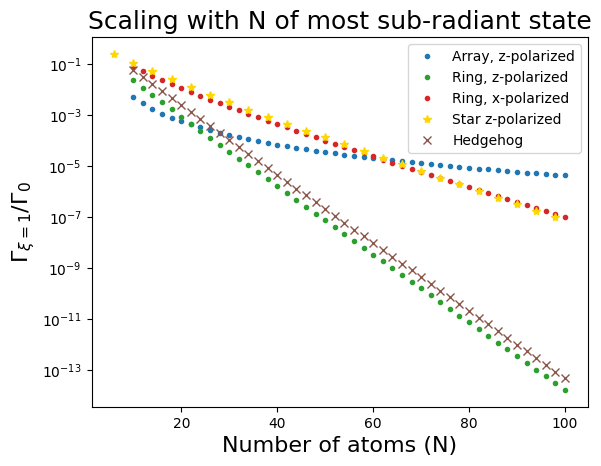

In [5]:
plt.plot(N_chain, subradiant_array_list, '.', label = 'Array, z-polarized' )
plt.plot(N_ring, subradiant_ring_z_list, '.', color = '#2ca02c', label = 'Ring, z-polarized')
plt.plot(N_ring, subradiant_ring_x_list, '.', color = '#d62728', label = 'Ring, x-polarized')
plt.plot(N_half_star * 2, subradiant_star_list, '*', color = 'gold', label = 'Star z-polarized' ) 
plt.plot(N_ring, subradiant_hedgehog_list,'x',  color = '#8c564b', label = 'Hedgehog')
#plt.plot(N_ring, subradiant_inverted_hedgehog_list, '.', label = 'Inverted hedgehog')
plt.yscale('log')
plt.title('Scaling with N of most sub-radiant state', fontsize = 18)
plt.ylabel(r'$\Gamma_{\xi = 1} / \Gamma_0$', fontsize = 16)
plt.xlabel('Number of atoms (N)', fontsize = 16)
plt.legend();

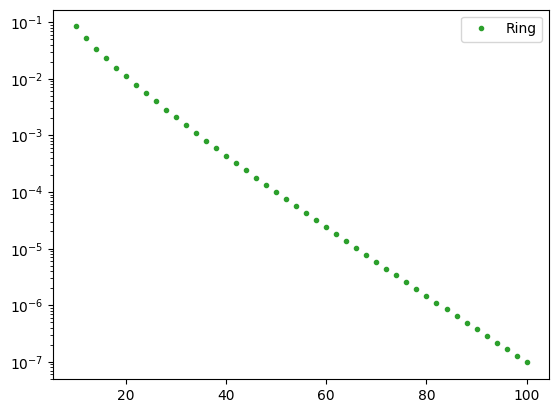

In [6]:
subradiant_hedgehog_list = []
subradiant_inverted_hedgehog_list = []
subradiant_ring_list = []
subradiant_array_list = []

dipole_vector_hat = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0]) #around with the circle
d_hedgehog = 0.3


N_ring = np.arange(10,101, 2)  #start from 3 since polygon must have 3 points
N_chain = np.arange(10,101, 2)

for n in N_ring: 
    ring_n = Qchains.RingGenerater(n)
    ring_eig_vals_n, ring_eig_vec_n = Qchains.FindEigenstates(ring_n, dipole_vector_hat, d_hedgehog)
    ring_most_sub_radiant_decay_rate = - np.max(2 * ring_eig_vals_n.real)
    subradiant_ring_list.append(ring_most_sub_radiant_decay_rate)

plt.plot(N_ring, subradiant_ring_list, '.', color = '#2ca02c', label = 'Ring')
plt.yscale('log')
plt.legend()